In [147]:
import cv2
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def face_cascade(name='lbp'):
    xml_path = {
        'lbp': 'opencv-files/lbpcascade_frontalface.xml',
        'haar': 'opencv-files/haarcascade_frontalface_alt.xml'
    }[name]
    return cv2.CascadeClassifier(xml_path)

def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def detect_face(img):
    gray = to_gray(img)
    fc = face_cascade('lbp')
    fch = face_cascade('haar')

    # where face is "rect" - (x, y, w, h)
    faces = fc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3)
    faces_h = fch.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    # choose moooooore faces
    if len(faces_h) > len(faces):
        faces = faces_h

    result = []
    for face in faces:
        (x, y, w, h) = face
        result.append((gray[y:y+w, x:x+h], face))
    
    # [(grayImg, rect), ...]
    return result


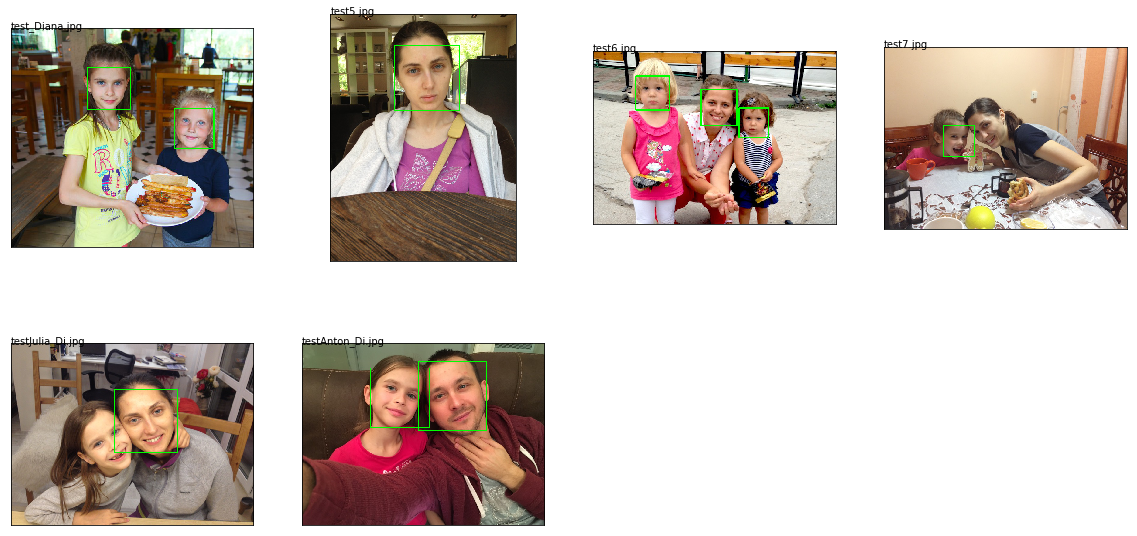

In [168]:
img_path_list = [
    'test-data/test_Diana.jpg',
    'test-data/test5.jpg',
    'test-data/test6.jpg',
    'test-data/test7.jpg',
    'test-data/testJulia_Di.jpg',
    'test-data/testAnton_Di.jpg'
]

plt.ion() # Turn interactive mode ON

plt.figure(figsize=(20,10))
columns = 4
i = 0
for img_path in img_path_list:
    img = mpimg.imread(img_path)
    plt.subplot(len(img_path_list) / columns + 1, columns, i + 1)

    faces = detect_face(img)
    for item in faces:
        draw_rectangle(img, item[1])
    
    plt.annotate(os.path.basename(img_path), xy=(0, 0), xytext=(0, 0))
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    i+=1

plt.show()